# CS146 Assignment 4
### Erkin Polat

## Data Table

|Study          | Treatment group |   Control group  |
|---------------|-----------------|------------------|
|Di Rienzo 2014 |     20 / 23     |        9 / 15    |
|Galli 1994     |     10 / 16     |       11 / 18    |
|Kaufman 1974   |     13 / 16     |        4 / 10    |
|Qin 2014       |     35 / 45     |       21 / 39    |
|Sanchez 2012   |     22 / 31     |       12 / 29    |
|Silny 2006     |      7 / 10     |        0 / 10    |
|**Totals**     |    107 / 141    |       57 / 121   |

The assumption with the non-hierarchical model is that the probabilities of success for each trial in the control group is the same. Also, the same applies for the treatment group. This assumes that the trials are independent and identical. However, with an initial look at the data the trials don't really look identical. Therefore, we will find a test statistic to test this assumption. The statistic I choose is the standard deviation of the success ratios in different trials. If the trials are identical or close to being identical, we would expect a low standard deviation and the standard deviation will be higher if the trials tend to be different than each other. Therefore, this is a good test statistic to use given our assumptions. We will generate 6 trials from each theta sampled from the posterior beta distribution with the sizes of the respective trial groups in the real data. We will use a binomial distribution for the posterior predictive distribution. In the end we will compute the test statistic for each 6-trials.

In [71]:
#importing the necessarry libraries

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [72]:
#Entering the data and computing the ratios of success in each trial

data_success = np.array([9, 11, 4, 21, 12, 0])
data_total = np.array([15, 18, 10, 39, 29, 10])
ratios = data_success/data_total

In [73]:
#Defining the test statistic function.

def test_statistic(A):
    return np.std(A)

In [74]:
#Posterior Parameters

alpha1 = 1 + sum(data_success)
beta1 = 1 + sum(data_total - data_success)

#Posterior Distribution
posterior = stats.beta(alpha1, beta1)

In [78]:
#Generating 10000 samples from the posterior distribution

post_samples = posterior.rvs(size=10000)

In [79]:
#Posterior predictive sampling

test_stat = []

#looping for each sample
for i in range(0, len(post_samples)):
    
    #creating this to store the success-ratio 6-tuples for each generated dataset
    std_vector = []
    
    #looping 6 times to use the same probability value 6-times
    for j in range(0, 6):
        
        #Drawing a sample from the binomial distribution for the given number of trials and p-value
        a = stats.binom.rvs(n= data_total[j], p=post_samples[i])
        
        #Storing the success ratio for the generated data
        std_vector.append(a/data_total[j])
        
    #Computing the test statistic on the 6-tuple    
    test_stat.append(test_statistic(std_vector))

In [80]:
#Computing the p-value

count = 0

#looping for each computed test statistic
for stat in test_stat:
    
    #Comparing if the generated statistic is greater than the actual statitic
    if stat > test_statistic(ratios):
        
        #If this is the case increase count by one
        count += 1

#We compute the ratio of the count to the all calculated statistics
print('p-value is: ', count/len(test_stat))

p-value is:  0.0078


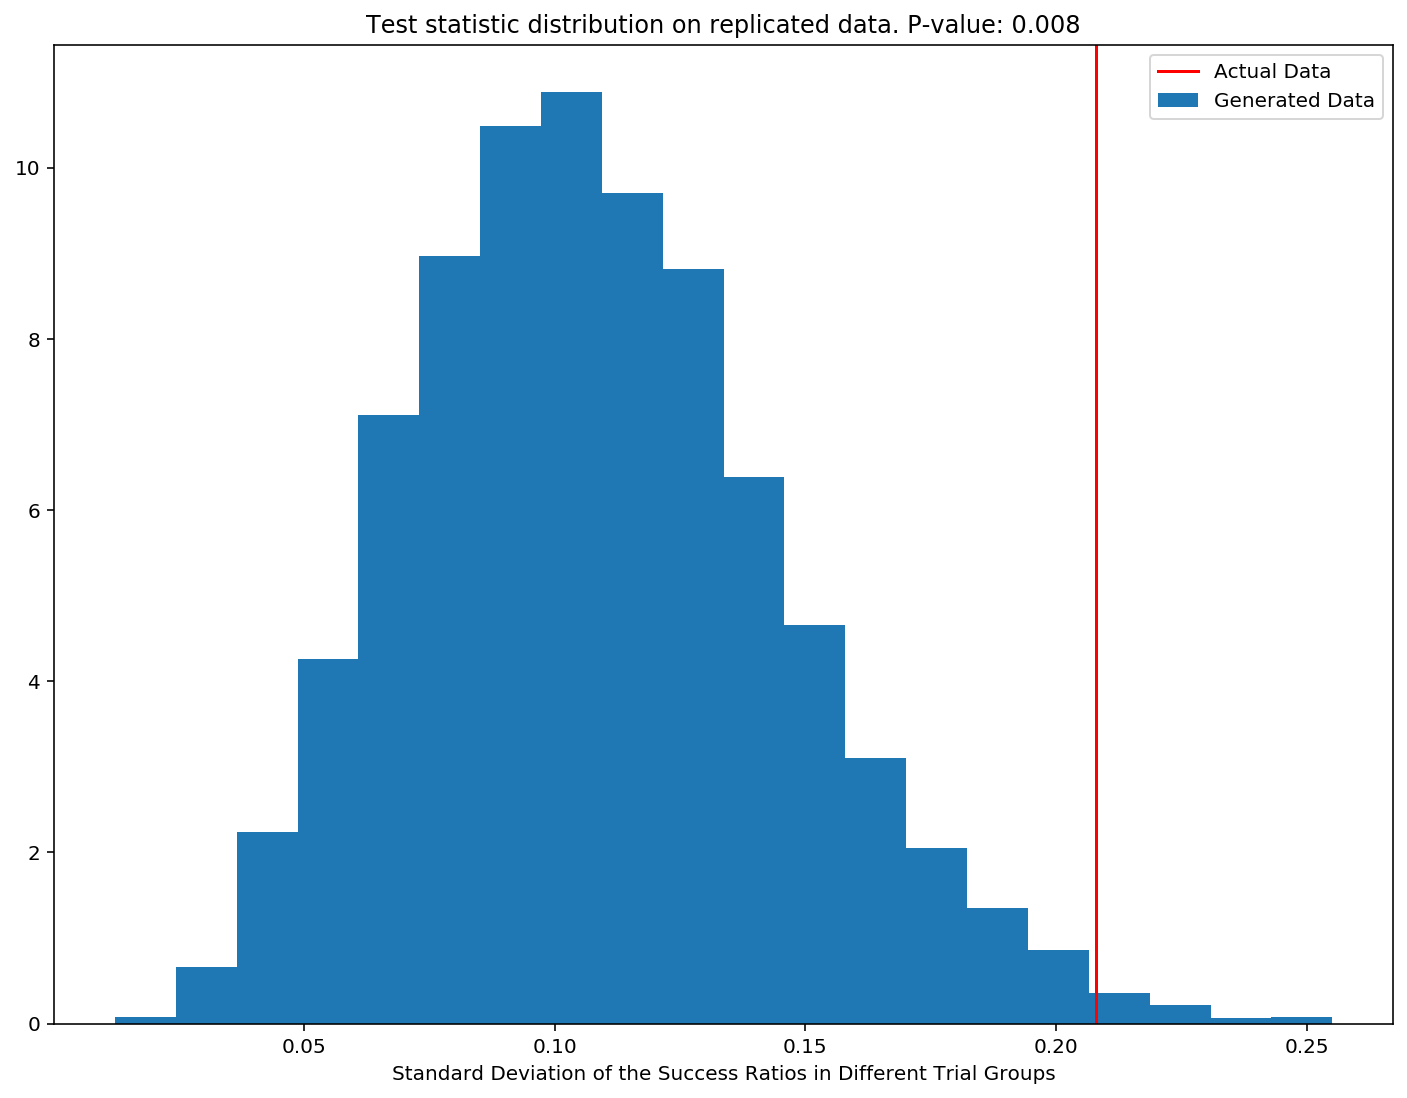

In [81]:
#Plotting the histogram

plt.figure(figsize=(12, 9))
plt.hist(test_stat, bins=20, label='Generated Data', density=True)
plt.axvline(test_statistic(ratios), color='red', label='Actual Data')
plt.legend()
plt.xlabel('Standard Deviation of the Success Ratios in Different Trial Groups')
plt.title('Test statistic distribution on replicated data. P-value: %.3f' % (count/len(test_stat)))
plt.show()


We have a p-value of 0.0078 and nearly all of the data lies to the left-hand side of the actual test statistic. Since the p-value is less than 0.01, we can say that our model doesn't represent our data very well. The model can potentially be improved using a hierarchical model where all seperate trials will be assumed to come from different distributions.